In [5]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [6]:
vgsales = Table.read_table('vgsales.csv')
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [20]:
years_since = 2022 - vgsales.column('Year')
years_since

array([ 16.,  37.,  14., ...,  14.,  12.,  19.])

In [7]:
vgsales.select('Global_Sales').where('Global_Sales', are.above(20))

Global_Sales
82.74
40.24
35.82
33
31.37
30.26
30.01
29.02
28.62
28.31


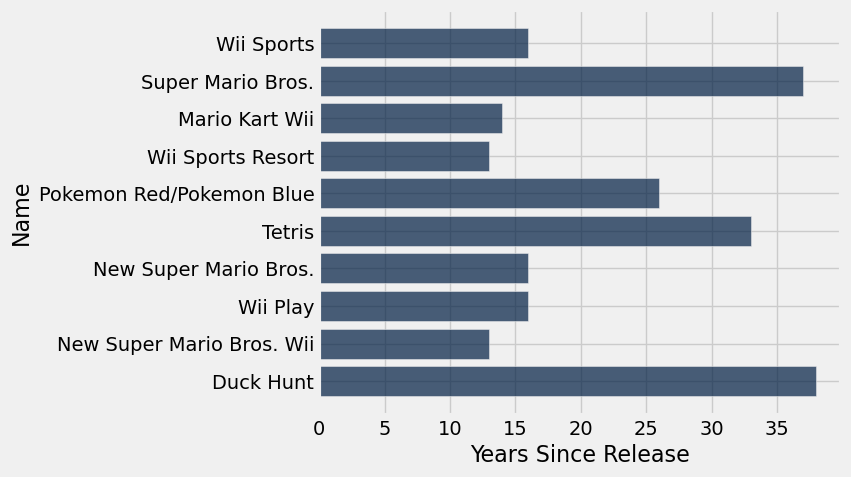

In [19]:
# New years_since variable
years_since = 2022 - vgsales.column('Year')

# Add Age column to table
vgsales = vgsales.with_column('Years Since Release', years_since)

# Select Nintendo, sort by global sales, and make new table with 10 largest gloabl sales
top10_nintendo = vgsales.where('Publisher', 'Nintendo').sort('Global_Sales', descending=True).take(np.arange(10))

# Barplot for Age of movies by title
top10_nintendo.barh('Name', 'Years Since Release')


In [21]:
genre = vgsales.select('Genre')
genre

Genre
Sports
Platform
Racing
Sports
Role-Playing
Puzzle
Platform
Misc
Platform
Shooter


In [22]:
genre_distribution = genre.group('Genre')

In [23]:
genre_distribution 

Genre,count
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310
Simulation,867


In [24]:
sum(genre_distribution.column('count'))

16598

## Bar Charts ##

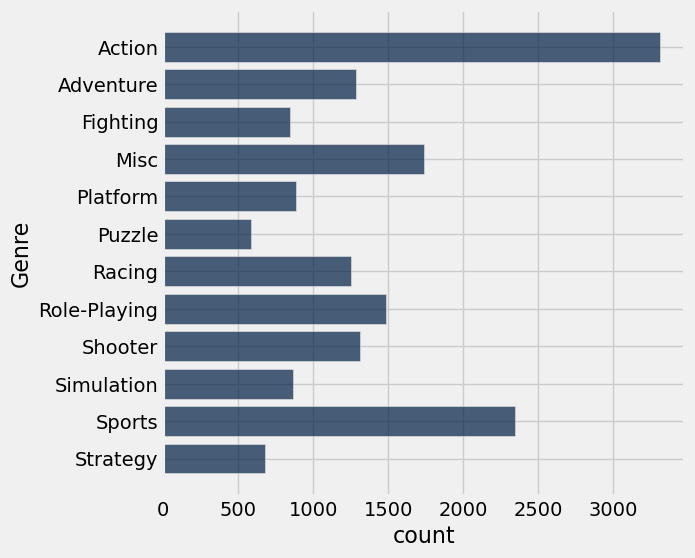

In [25]:
genre_distribution.barh('Genre')

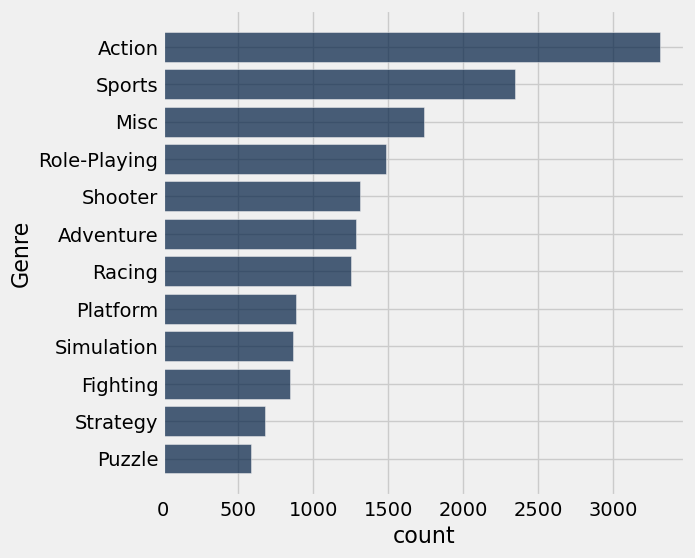

In [26]:
genre_distribution.sort('count', descending=True).barh('Genre')

## Numerical Distribution - Binning 

In [27]:
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years Since Release
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,16
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,37
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,14
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33,13
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37,26
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26,33
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01,16
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02,16
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62,13
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,38


In [28]:
min(years_since), max(years_since)

(2.0, 42.0)

In [29]:
my_bins = make_array(0, 5, 10, 15, 20, 30, 43)

In [30]:
binned_data = vgsales.bin('Years Since Release', bins = my_bins)
binned_data

bin,Years Since Release count
0,1
5,2089
10,5914
15,4689
20,3329
30,305
43,0


In [31]:
sum(binned_data.column('Years Since Release count'))

16327

In [32]:
vgsales.sort('Years Since Release', descending=True)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years Since Release
180,Madden NFL 2004,PS2,nan,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,nan
378,FIFA Soccer 2004,PS2,nan,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,nan
432,LEGO Batman: The Videogame,Wii,nan,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0,0.29,3.17,nan
471,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,nan,1.57,1.02,0,0.41,3,nan
608,Space Invaders,2600,nan,Shooter,Atari,2.36,0.14,0,0.03,2.53,nan
625,Rock Band,X360,nan,Misc,Electronic Arts,1.93,0.34,0,0.21,2.48,nan
650,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,Konami Digital Entertainment,2.15,0.18,0,0.07,2.39,nan
653,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,LucasArts,1.54,0.63,0,0.22,2.39,nan
713,Call of Duty 3,Wii,nan,Shooter,Activision,1.19,0.84,0,0.23,2.26,nan
784,Rock Band,Wii,nan,Misc,MTV Games,1.35,0.56,0,0.2,2.11,nan


In [33]:
vgsales.bin('Years Since Release', bins = np.arange(0, 45, 5))

bin,Years Since Release count
0,1
5,2089
10,5914
15,4689
20,2377
25,952
30,132
35,118
40,0


In [34]:
vgsales.bin('Years Since Release', bins = np.arange(0, 21, 5))

bin,Years Since Release count
0,1
5,2089
10,5914
15,5518
20,0


In [35]:
vgsales.where('Years Since Release', are.above_or_equal_to(20)).num_rows

3634

## Histograms ##

In [36]:
my_bins

array([ 0,  5, 10, 15, 20, 30, 43])

In [37]:
binned_data

bin,Years Since Release count
0,1
5,2089
10,5914
15,4689
20,3329
30,305
43,0


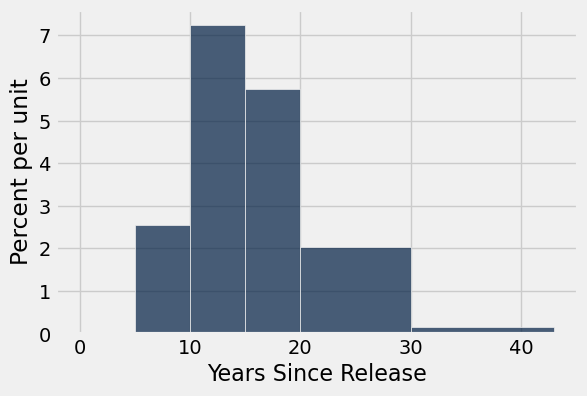

In [38]:
# Let's make our first histogram!
vgsales.hist('Years Since Release', bins = my_bins)

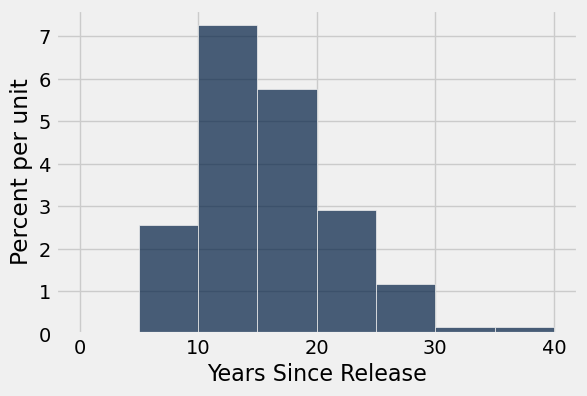

In [39]:
# Let's try equally spaced bins instead.
vgsales.hist('Years Since Release', bins = np.arange(0, 45, 5))

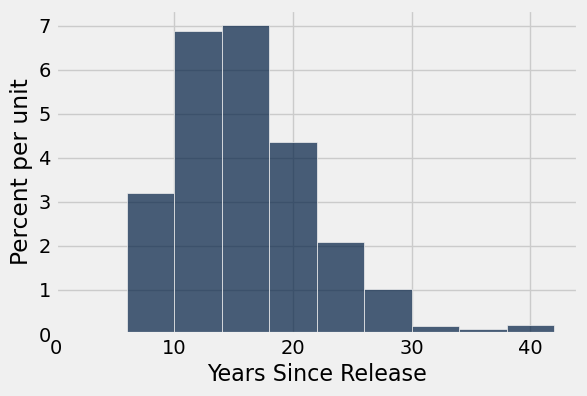

In [40]:
# Let's try not specifying any bins!
vgsales.hist('Years Since Release')

In [41]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Years Since Release count')/sum(binned_data.column('Years Since Release count')))

In [42]:
binned_data

bin,Years Since Release count,Percent
0,1,0.00612482
5,2089,12.7948
10,5914,36.2222
15,4689,28.7193
20,3329,20.3895
30,305,1.86807
43,0,0


In [43]:
sum(binned_data.column('Percent'))

100.0

## Height ##

### Question: What is the height of the [20, 30) bin?

In [44]:
# Step 1: Calculate % of games in the [20, 30) bin
percent = binned_data.where('bin', 20).column('Percent').item(0)
percent

20.389538800759478

In [45]:
# Step 2: Calculate the width of the 20-30 bin
width = 30 - 20

In [46]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

2.038953880075948

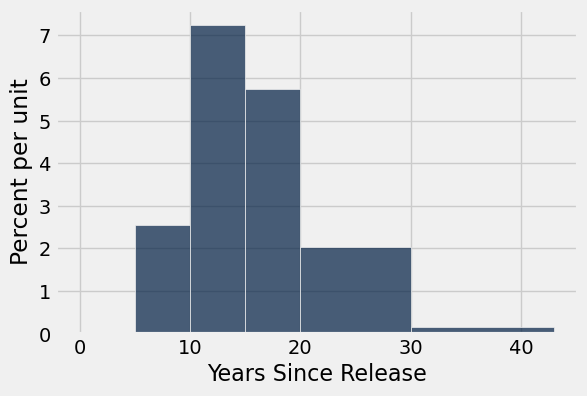

In [47]:
vgsales.hist('Years Since Release', bins = my_bins)

### What are the heights of the rest of the bins?

In [53]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [54]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [55]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [51]:
bin_lefts

bin,Years Since Release count,Percent,Width,Height
0,1,0.00612482,5,0.00122496
5,2089,12.7948,5,2.55895
10,5914,36.2222,5,7.24444
15,4689,28.7193,5,5.74386
20,3329,20.3895,10,2.03895
30,305,1.86807,13,0.143698


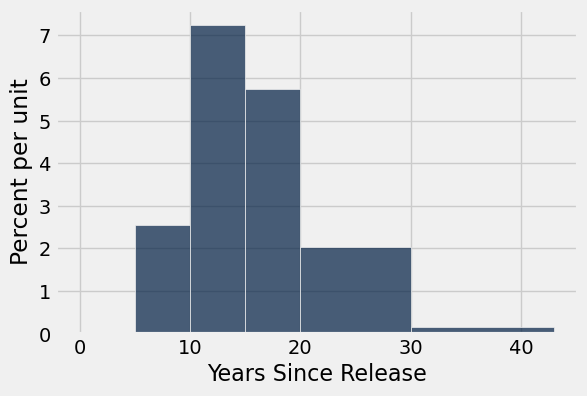

In [52]:
vgsales.hist('Years Since Release', bins = my_bins)